# Model Engineering

## Data Preparation for Machine Learning

In [1]:
# Import all relevant libraries
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('logger')

logger.info("Starting code...")
logger.debug("Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, HuberRegressor, RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Set default plotting style and set all parematers as standard ready to publish plots
def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")

    # Set the default context with font scale
    sns.set_context("paper",
                    font_scale=1.3, rc={"lines.linewidth": 1.0})

    # Set the default color palette
    sns.set_palette("plasma")

    # Set the default figure size
    plt.rcParams['figure.figsize'] = [10, 6]

# Call the function to set the default plotting style
set_plotting_style()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

logger.info("Libraries imported...")
logger.debug("Libraries imported...")

INFO:logger:Starting code...
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:logger:Libraries imported...


During the Machine Learning Modeling Stage, there are several key questions that should be answered:

1. **What is the problem type?** Is it a regression, classification, clustering, or another type of problem? This will determine the types of models that can be used.

2. **What is the target variable?** This is the variable that the model will be trained to predict.

3. **What are the features?** These are the variables that the model will use to make its predictions.

4. **What is the evaluation metric?** This is the metric that will be used to measure the performance of the model. It could be accuracy, precision, recall, F1 score, ROC AUC for classification problems, or mean absolute error, mean squared error, R-squared for regression problems.

5. **What is the validation strategy?** This could be a simple train/test split, K-fold cross-validation, or time-based validation, etc.

6. **Which machine learning models will be used?** Based on the problem type, various models like linear regression, logistic regression, decision trees, random forest, SVM, KNN, neural networks, etc., can be used.

7. **How will the model be tuned?** This involves selecting the hyperparameters for the model, which can be done through methods like grid search or random search.

8. **How will the model's performance be improved?** This could involve feature engineering, feature selection, using more complex models, ensemble methods, etc.

9. **How will the model be deployed?** This involves deciding how the model will be used in production.

10. **How will the model be maintained?** This involves monitoring the model's performance over time and retraining it if necessary.

In [2]:
import os

# Check if the file exists
if os.path.exists(r'C:/Users/HP/Desktop/Med_Cost_Prediction/Data/For_Modeling/processed_data.csv'):
    # Import the clean dataset    
    processed_medcost_df = pd.read_csv('C:/Users/HP/Desktop/Med_Cost_Prediction/Data/For_Modeling/processed_data.csv')
    print("File found!")
else:
    print("File not found!")
    
# Display first few rows of the dataset
processed_medcost_df.head()

File found!


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


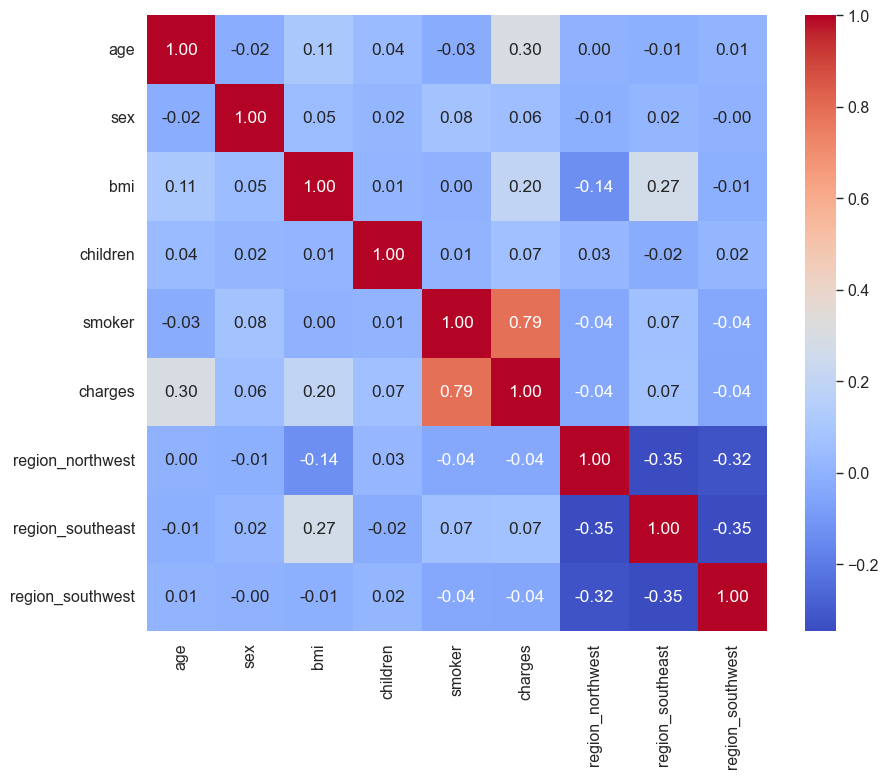

In [3]:
# Calculate the correlation matrix
corr = processed_medcost_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

In [4]:
# Features
X = processed_medcost_df.drop('charges', axis=1)

# Create the target variable
y = processed_medcost_df['charges']

# Segment the 'charges' column into 10 bins
bin_numbers = pd.qcut(y, 
                      q=10, 
                      labels=False, 
                      duplicates='drop')

# Split the data into temporary and testing sets (90%-10% split)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, 
                                                  test_size=0.1, 
                                                  stratify=bin_numbers, 
                                                  shuffle=True, 
                                                  random_state=123)

# Segment the y_test column into 10 bins 
bin_numbers = pd.qcut(y_temp, 
                      q=10, 
                      labels=False, 
                      duplicates='drop')

# Split the remaining data into training and validation sets (90%-10% split)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, 
                                                      test_size=0.1, 
                                                      stratify=bin_numbers, 
                                                      shuffle=True, 
                                                      random_state=123)

# Print the shape of the data
print("Shape of the training data: ", X_train.shape)
print("Shape of the validation data: ", X_valid.shape)
print("Shape of the test data: ", X_test.shape)

Shape of the training data:  (1082, 8)
Shape of the validation data:  (121, 8)
Shape of the test data:  (134, 8)


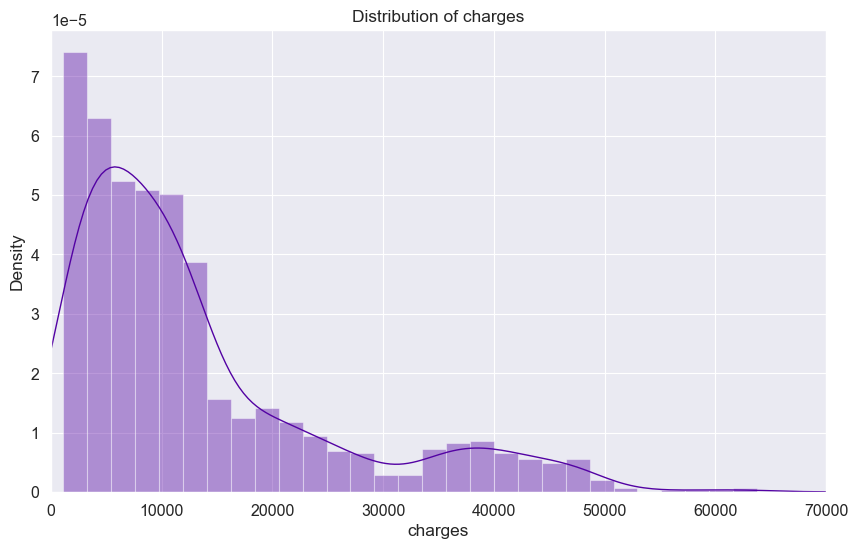

In [5]:
# Plot the distributions for y, y_train, y_test, y_valid using seaborn
sns.distplot(y, hist=True, label='y')

# Set the limit for the xaxis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of charges")

# Show the plot
plt.show()


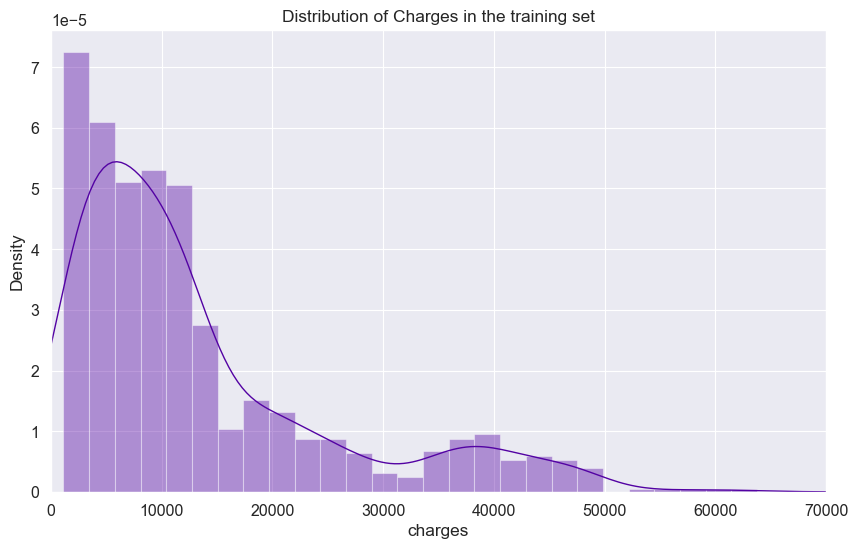

In [6]:
# Plot the distribution of charges in the train set
sns.distplot(y_train, hist=True, label='y_train')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the training set")

# Show the plot
plt.show()


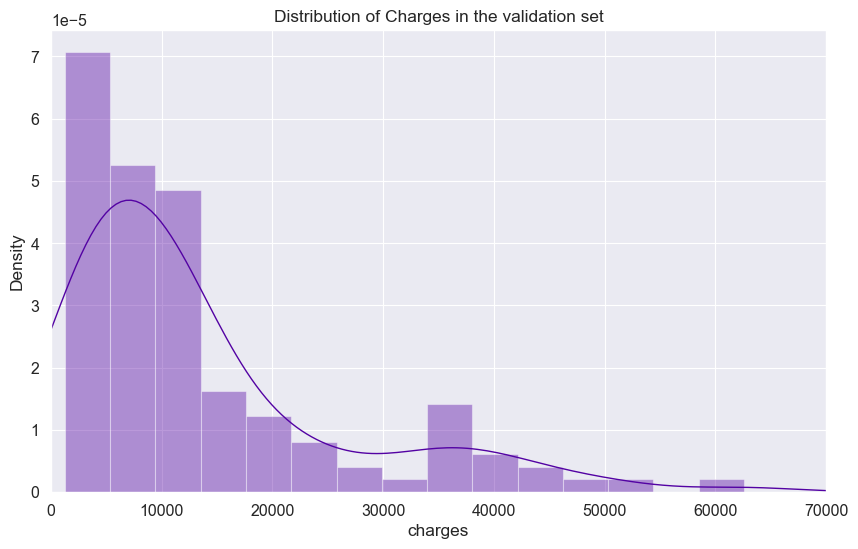

In [7]:
# Plot the distribution of charges in the validation set
sns.distplot(y_valid, hist=True, label='y_valid')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the validation set")

# Show the plot
plt.show()

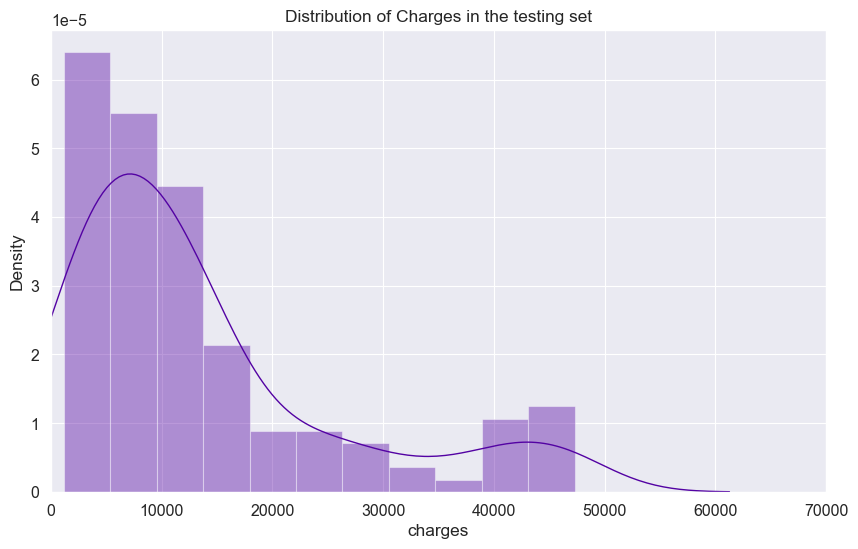

In [8]:
# Plot the distribution of charges in the test set
sns.distplot(y_test, hist=True, label='y_test')

# Set the limit for the x-axis
plt.xlim(0, 70000)

# Add a title
plt.title("Distribution of Charges in the testing set")

# Show the plot
plt.show()

In [9]:
# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Transform the validation data
X_valid = scaler.transform(X_valid)

# Transform the test data
X_test = scaler.transform(X_test)

## Modeling

In [12]:
# Define your models and their respective hyperparameters
models = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': list(range(1, 11)),
            'min_samples_split': list(range(2, 11)), 
            'min_samples_leaf': list(range(1, 11)), 
            'max_features': list(range(1, X_train.shape[1])), 
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': list(range(1, 11)), 
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 1], 
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 1], 
            'loss': ['linear', 'square', 'exponential']
        }
    }
}


In [13]:
from xgboost import XGBRegressor

# Add XGBoost to your models
models['xgboost'] = {
    'model': XGBRegressor(),
    'params': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [3, 4, 5]
    }
}


In [14]:
import pandas as pd

# Initialize a dictionary to store the results
results = {
    'Model': [],
    'Best Parameters': [],
    'Best Score': [],
    'R^2 Score': [],
    'Mean Absolute Error': [],
    'Root Mean Squared Error': []
}

# For each model, perform grid search, and print the best parameters and score
for name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'], cv=5)
    grid_search.fit(X_train, y_train)

    # Predict on the test set and calculate the evaluation metrics
    y_pred = grid_search.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    # Store the results in the dictionary
    results['Model'].append(name)
    results['Best Parameters'].append(grid_search.best_params_)
    results['Best Score'].append(grid_search.best_score_)
    results['R^2 Score'].append(r2)
    results['Mean Absolute Error'].append(mae)
    results['Root Mean Squared Error'].append(rmse)

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

results_df

,Model,Best Parameters,Best Score,R^2 Score,Mean Absolute Error,Root Mean Squared Error
0,linear_regression,{},0.743811,0.706627,4368.847544,6762.270439
1,ridge,{'alpha': 0.1},0.743822,0.706685,4367.176958,6761.602449
2,lasso,{'alpha': 1},0.743813,0.706735,4367.743130,6761.021023
3,decision_tree,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.852950,0.847228,2621.235532,4879.824902
4,random_forest,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.858536,0.857140,2439.025786,4718.870121
5,gradient_boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.858983,0.850546,2617.344710,4826.542505
6,adaboost,"{'learning_rate': 0.001, 'loss': 'exponential'...",0.848357,0.849917,2871.354736,4836.684043
7,xgboost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.858649,0.850849,2556.867935,4821.644172


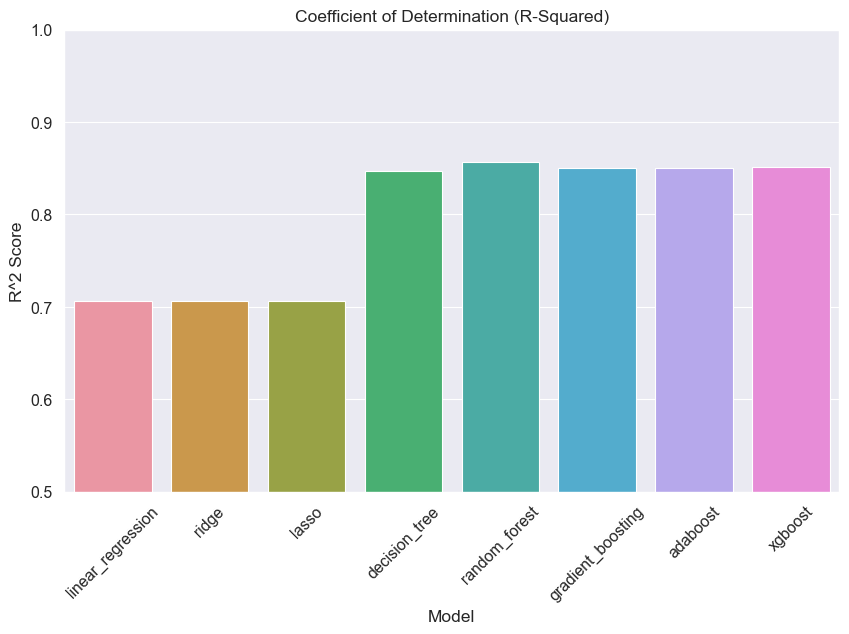

In [23]:
# Plot the results
plt.xticks(rotation=45)
sns.barplot(x='Model', y='R^2 Score', data=results_df)
plt.title('Coefficient of Determination (R-Squared)')
plt.ylim(0.5, 1.0)
plt.show()

## Model Interpretability

The best performing model is the Random Forest Model, we can get its best parameters and explain and interpret our model. 

In [10]:
# Get the feature names back
feature_names = X.columns
print(f"Feature Names: {feature_names}")

# Initialize the SequentialFeatureSelector

# Set the model to linear regression
# Set the number of features to 5
# Set the scoring function to r2
# Set the forward parameter to True
# Set the floating parameter to False
# Set the verbose parameter to 2
# Set the cv parameter to 2


Feature Names: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [11]:
# Set the column names for X_train, X_valid and X_test
X_train = pd.DataFrame(X_train, columns=feature_names)
X_valid = pd.DataFrame(X_valid, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Set the column names for y_train, y_valid, y_test
y_train = pd.DataFrame(y_train, columns=['charges'])
y_valid = pd.DataFrame(y_valid, columns=['charges'])
y_test = pd.DataFrame(y_test, columns=['charges'])

In [72]:
# Filter for the Random Forest model and get the best parameters

best_params_rf = results_df[results_df['Model'] == 'random_forest']['Best Parameters'].values[0]
print(best_params_rf)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


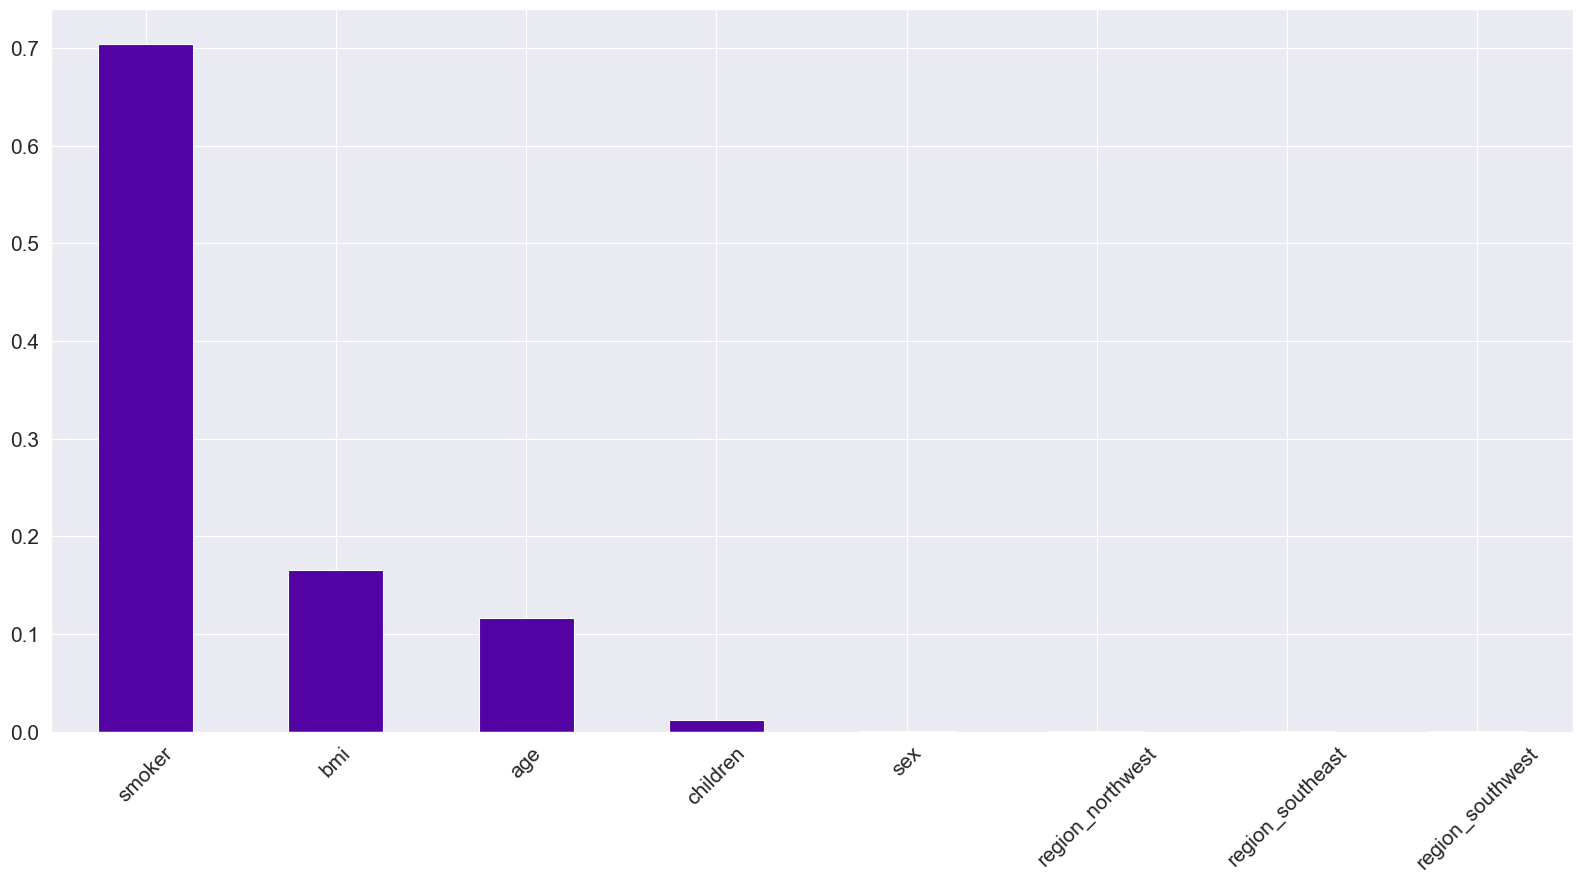

In [12]:
# Train your best model
best_model = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10)
best_model.fit(X_train, y_train)

# Get feature importances
importances = best_model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_train.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

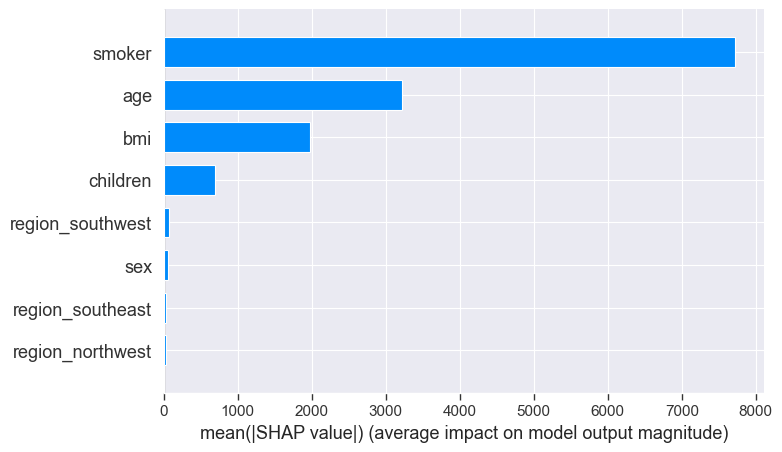

In [13]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [14]:
# Convert SHAP values to a DataFrame for easier handling
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-2908.386990,-17.176300,1104.534113,1187.236547,-5812.520489,-9.970001,-4.783447,124.501677
1,-2895.071100,-43.841692,-998.333782,283.111819,-3748.821411,-5.291912,-7.295090,124.501677
2,-3558.830538,29.258752,720.382545,-1136.302789,-5717.740490,-4.103157,-4.515108,-119.337323
3,4674.051657,72.387076,1532.797025,579.756243,-5677.343703,-10.360761,-67.517471,-95.780205
4,4753.497848,68.540201,-1072.889342,-640.893040,-3808.565775,-3.874204,-69.470674,16.061090
...,...,...,...,...,...,...,...,...
1077,5210.770887,67.481918,728.131008,-729.444201,-5800.756909,25.179278,-22.721442,16.061090
1078,5269.213878,67.183994,-817.532566,-675.562047,-3851.525131,26.834505,-25.306796,16.061090
1079,-1879.432044,-18.714883,751.711158,693.379827,-5691.666930,-14.153613,17.802624,63.021835
1080,-3169.597353,28.960827,-1076.423132,-1064.101552,-3936.561498,-1.298369,-6.097477,34.849444


age                 3221.701679
sex                   60.128081
bmi                 1976.284149
children             693.770549
smoker              7724.198088
region_northwest      26.022669
region_southeast      27.279520
region_southwest      68.022747
dtype: float64


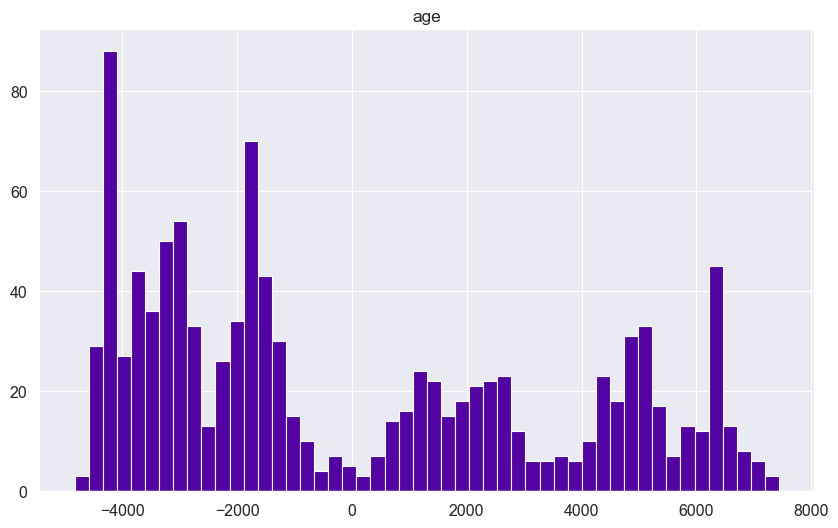

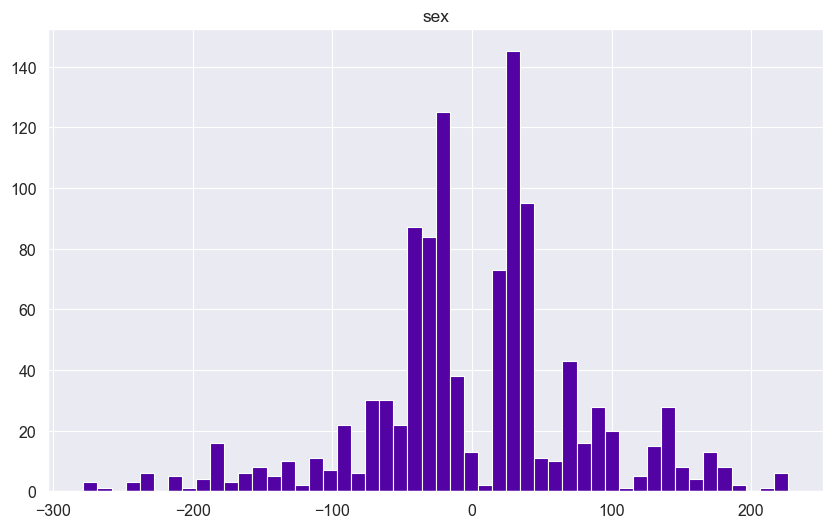

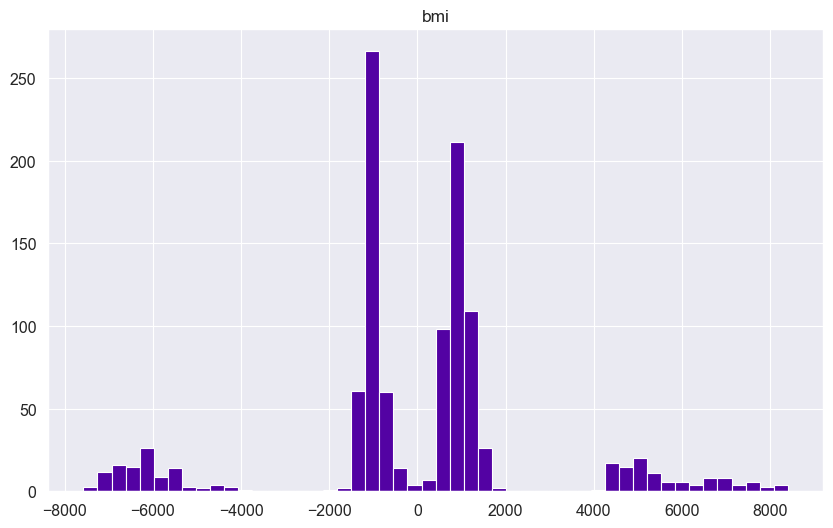

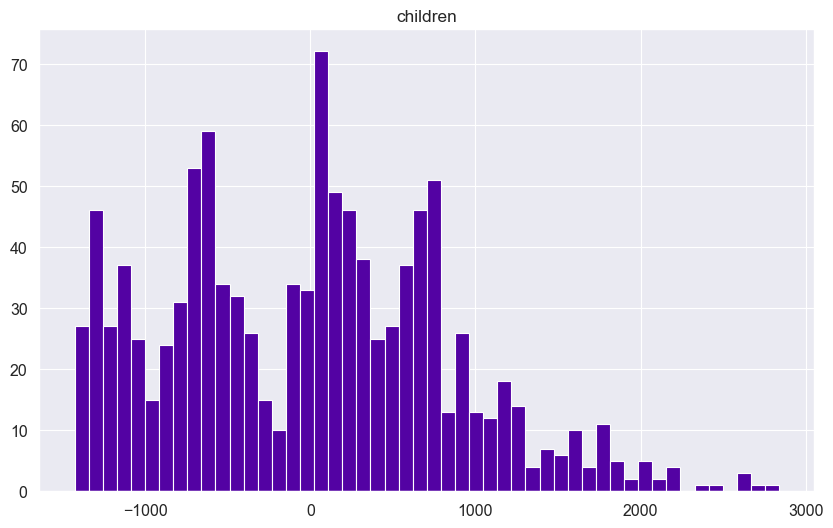

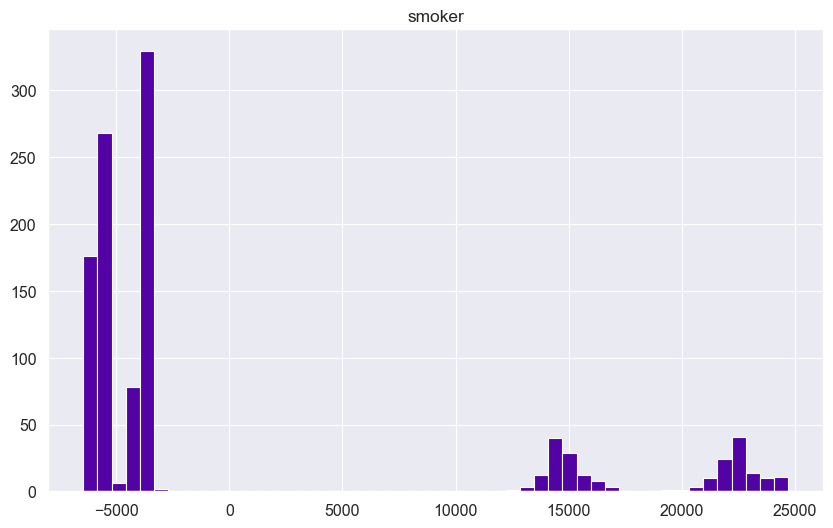

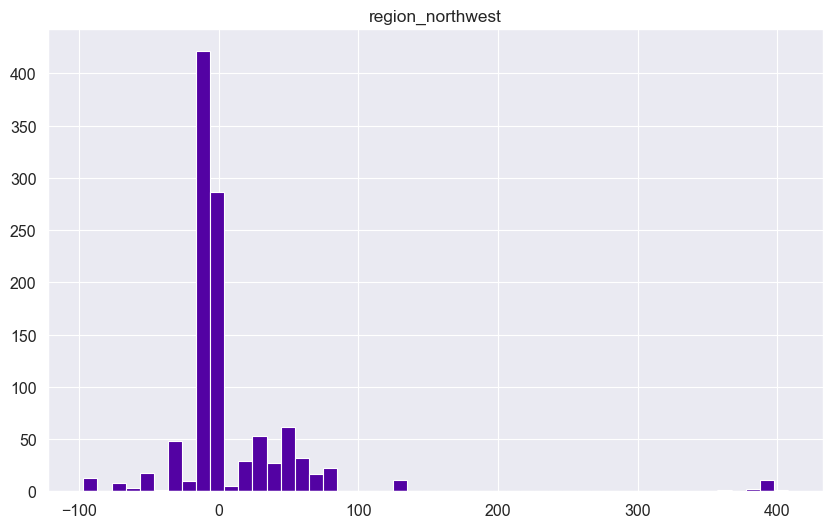

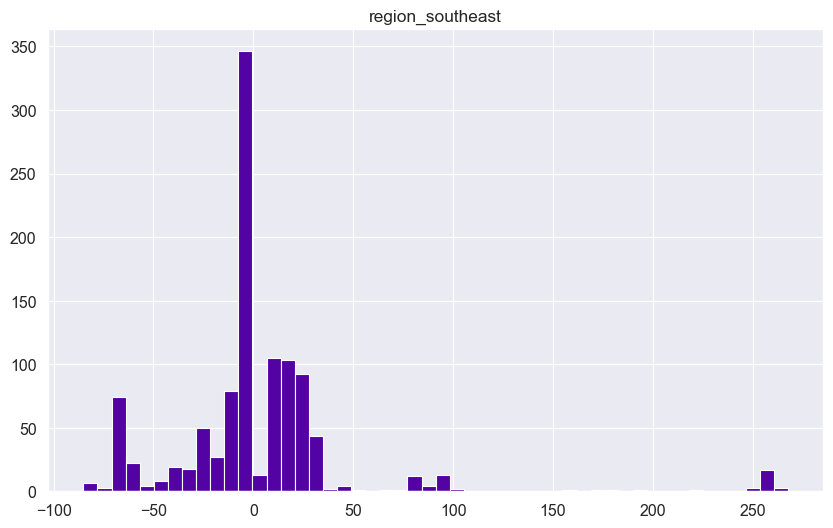

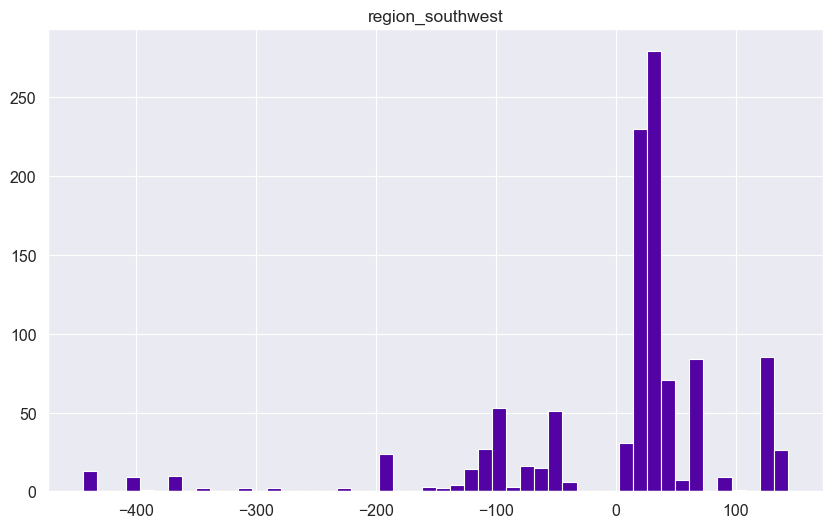

In [15]:
# Calculate and print the mean absolute SHAP value for each feature
mean_shap_values = shap_df.abs().mean()
print(mean_shap_values)

# Plot the distribution of SHAP values for each feature
for col in shap_df.columns:
    shap_df[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [16]:
# Calculate and print the standard deviation of SHAP values for each feature
std_shap_values = shap_df.std()

# You can also sort the features by their standard deviation to see which features have the most variable contributions
most_variable_features = std_shap_values.sort_values(ascending=False)
print(most_variable_features)

smoker              9776.840383
age                 3610.403853
bmi                 2860.159583
children             846.422580
region_southwest     102.224165
sex                   79.439092
region_northwest      55.140560
region_southeast      49.958743
dtype: float64


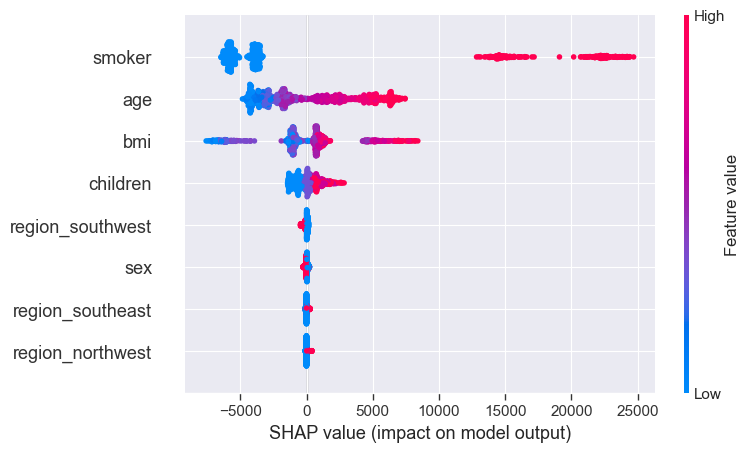

In [17]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_train)

In [18]:
# Initialize JavaScript visualizations
shap.initjs()

# Create a force plot for the first instance in the training set
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Computing partial dependence plots...
done in 1.227s


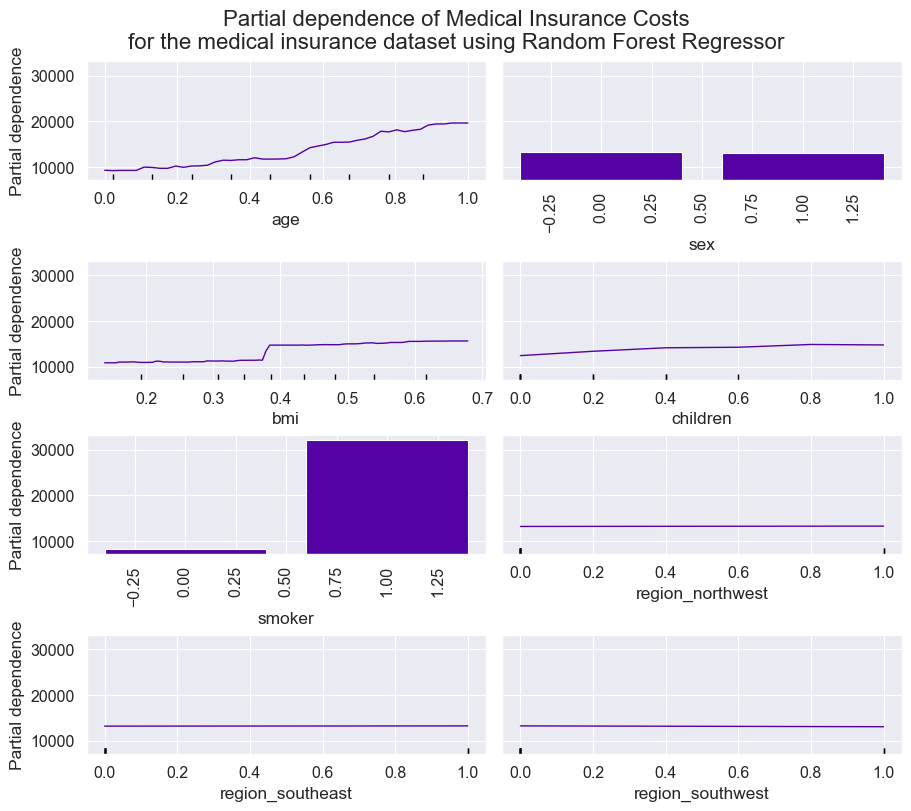

In [19]:
from time import time

from sklearn.inspection import PartialDependenceDisplay



print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ["age", "sex", "bmi", "children", "smoker", "region_northwest", "region_southeast", "region_southwest"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ["sex", "smoker"],
}
tic = time()
_, ax = plt.subplots(ncols=2, nrows=4, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_train,
    **features_info,
    ax=ax
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    (
        "Partial dependence of Medical Insurance Costs\n"
        "for the medical insurance dataset using Random Forest Regressor"
    ),
    fontsize=16,
)

## Model Retraining using the most important features. 

In [81]:
# Predict the target variable for the test set
y_test_pred1 = best_model.predict(X_test)

# Calculate the R^2 score of the model on the test set
r2 = r2_score(y_test, y_test_pred1)
print(f'R^2 score on test set: {r2}')

R^2 score on test set: 0.8683838888006177


In [82]:
# Select only the specified features
features = ['age', 'bmi', 'smoker', 'children']
X_train_selected = X_train[features]

# Train your best model on the selected features
best_model.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=10)

In [83]:
# Select only the specified features from the validation set
X_valid_selected = X_valid[features]

# Predict the target variable for the validation set
y_valid_pred = best_model.predict(X_valid_selected)


# Calculate the R^2 score of the model on the validation set
r2 = r2_score(y_valid, y_valid_pred)
print(f'R^2 score on validation set: {r2}')

R^2 score on validation set: 0.8507673795625539


### Prediction on the Test Set

In [84]:
# Select only the specified features from the test set
X_test_selected = X_test[features]

# Predict the target variable for the test set
y_test_pred = best_model.predict(X_test_selected)


# Calculate the R^2 score of the model on the test set
r2 = r2_score(y_test, y_test_pred)
print(f'R^2 score on test set: {r2}')

R^2 score on test set: 0.8637214602672852


When a model is trained on more features, it has more information to learn from, which can potentially lead to better performance. However, this is not always the case as it also depends on the quality and relevance of the features. Here are a few possible reasons why your model performed better when trained on all features:

1. **Relevant Information**: The features you excluded might contain relevant information that helps the model make more accurate predictions. Even if a feature is not the most important one, it might still contribute to the accuracy of the model.

2. **Feature Interactions**: Some models, like Random Forest, can capture interactions between features. By excluding some features, you might have removed these interactions, leading to a decrease in performance.

3. **Overfitting**: If your dataset is small, training on more features can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data. However, our model performed better on the validation and test sets when trained on all features, so overfitting is likely not the issue here.

Remember, feature selection should be done carefully, considering the importance and relevance of the features, the risk of overfitting, and the computational cost of training and predicting with the model. It's always a good idea to experiment with different sets of features and validate the performance of the model using a validation set or cross-validation.

### Save the Model

In [85]:
import pickle


# Train your best model
best_model = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10)
best_model.fit(X_train, y_train)

# Save the model to a file in the 'C:\Users\HP\Desktop\Med_Cost_Prediction\Code\Deployment' folder
with open('C:\\Users\\HP\\Desktop\\Med_Cost_Prediction\\Code\\Deployment\\model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


# Save the scaler to a file in the 'C:\Users\HP\Desktop\Med_Cost_Prediction\Code\Deployment' folder
with open('C:\\Users\\HP\\Desktop\\Med_Cost_Prediction\\Code\\Deployment\\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)